<a href="https://colab.research.google.com/github/soaresedirlan/data_science/blob/master/airbnb_rio_de_janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb

---



O [Airbnb](https://www.airbnb.com.br/) permite aos indivíduos alugar o todo ou parte de sua própria casa, como uma forma de acomodação extra. O site fornece uma plataforma de busca e reservas entre a pessoa que oferece a acomodação e o turista que busca pela locação. Abrange mais de 500 mil anúncios em mais de 35.000 cidades e 192 países. Desde sua criação em Novembro de 2008 até Junho de 2012, mais de 10 milhões de reservas foram agendadas via Airbnb.[

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>



**Neste *notebook*, iremos analisar os dados referentes à cidade do Rio de Janeiro, e ver quais insights podem ser extraídos a partir de dados brutos.**


![alt text](http://1234voce.com/wp-content/uploads/2018/07/rj-unidade1.png)

Rio de Janeiro (frequentemente referida simplesmente como Rio) é um município brasileiro, capital do estado homônimo, situado no Sudeste do país. Maior destino turístico internacional no Brasil, da América Latina e de todo o Hemisfério Sul, a capital fluminense é a cidade brasileira mais conhecida no exterior, funcionando como um "espelho", ou "retrato" nacional, seja positiva ou negativamente. É a segunda maior metrópole do Brasil (depois de São Paulo), a sexta maior da América e a trigésima quinta do mundo. Sua população estimada pelo IBGE para 1.º de julho de 2019 era de 6 718 903 habitantes. Tem o epíteto de Cidade Maravilhosa e aquele que nela nasce é chamado de carioca. Parte da cidade foi designada Patrimônio Cultural da Humanidade, com o nome "Rio de Janeiro: Paisagem Carioca entre a Montanha e o Mar", classificada pela UNESCO em 1 de julho de 2012 e categorizada como uma Paisagem Cultural. Em 18 de janeiro de 2019, a cidade foi eleita pela UNESCO como a primeira Capital Mundial da Arquitetura.

É um dos principais centros econômicos, culturais e financeiros do país, sendo internacionalmente conhecida por diversos ícones culturais e paisagísticos, como o Pão de Açúcar, o morro do Corcovado com a estátua do Cristo Redentor, as praias dos bairros de Copacabana, Ipanema e Barra da Tijuca, entre outras; os estádios do Maracanã e Nilton Santos; o bairro boêmio da Lapa e seus arcos; o Theatro Municipal do Rio de Janeiro; as florestas da Tijuca e da Pedra Branca; a Quinta da Boa Vista; a Biblioteca Nacional; a ilha de Paquetá; o réveillon de Copacabana.

Representa o segundo maior PIB do país (e o 30º maior do mundo), estimado em cerca de 329 bilhões de reais (IBGE/2016), e é sede das duas maiores empresas brasileiras - a Petrobras e a Vale, e das principais companhias de petróleo e telefonia do Brasil, além do maior conglomerado de empresas de mídia e comunicações da América Latina, o Grupo Globo. Contemplado por grande número de universidades e institutos, é o segundo maior polo de pesquisa e desenvolvimento do Brasil, responsável por 19% da produção científica nacional, segundo dados de 2005. Destaque para a Universidade Federal do Rio de Janeiro que publicou 5 952 artigos entre 1998 e 2002. Rio de Janeiro é considerada uma cidade global beta - pelo inventário de 2008 da Universidade de Loughborough (GaWC).



Vamos Apenas até a Exploração de Dados!

## Checklist

1. Definição do Problema
2. Obtenção dos Dados
3. Exploração dos Dados
4. Preparação dos Dados
5. Construção do Modelo
6. Avaliação

## 1 -  Definição do Problema

O turismo no estado do Rio de Janeiro oferece diversas atrações históricas, naturais e culturais.
A capital fluminense é internacionalmente conhecida pela beleza de suas praias e morros, além de ser um grande polo de turismo cultural, contemplada por diversos museus, teatros e casas de espetáculos. Segundo a EMBRATUR, é o destino mais procurado pelos turistas estrangeiros que visitam o Brasil a lazer, e o segundo colocado no turismo de negócios e eventos. 

Diante disso vamos verificar o preço dos Apartamentos/Casas para se alugar, e suas respectivas localidades. 

## 2 - Obtenção dos Dados
Os dados foram baixados no site do [Airbnb](http://insideairbnb.com/get-the-data.html).


Para a análise, será baixo apenas o arquivo `listings.csv`  -  *Summary information and metrics for listings in Rio de Janeiro (good for visualisations).*


In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#Permitir vizualiza todas as colunas
pd.options.display.max_columns = None

#Renderizar o grafico direto no notebook
%matplotlib inline

# suprimir os warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2020-04-20/visualisations/listings.csv")

## 3 - Exploração dos Dados
Em uma análise inicial, serão estudadas cada variável. É importante verificar seu nome, tipo, porcentagem de valores faltantes, presença de outliers e tipo de distribuição.

In [ ]:
**Dicionário das variáveis**:

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.


In [ ]:
# ver as 5 primeiras entradas
display(df.head())

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,17878,Very Nice 2Br - Copacabana - WiFi,68997,Matthias,NaN,Copacabana,-22.96592,-43.17896,Entire home/apt,218,5,251,2020-04-06,2.11,1,0
1,21280,Renovated Modern Apt. Near Beach,81163,Jules,NaN,Ipanema,-22.98467,-43.19611,Entire home/apt,422,5,94,2020-03-22,1.25,1,69
2,25026,Beautiful Modern Decorated Studio in Copa,102840,Viviane,NaN,Copacabana,-22.97712,-43.19045,Entire home/apt,158,7,238,2020-02-15,1.98,3,95
3,31560,NICE & COZY 1BDR - IPANEMA BEACH,135635,Renata,NaN,Ipanema,-22.98302,-43.21427,Entire home/apt,342,2,282,2020-03-02,2.37,1,0
4,35636,Cosy flat close to Ipanema beach,153232,Patricia,NaN,Ipanema,-22.98816,-43.19359,Entire home/apt,479,2,181,2020-03-15,2.29,1,358


### **1 - Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**
 

In [ ]:
# identificar o volume de dados do DataFrame
print('Entradas:\t {}'.format(df.shape[0]))
print('Variáveis:\t {}'.format(df.shape[1]))


# verificar as 5 primeiras entradas do dataset
display(df.dtypes)


Entradas:	 35870
Variáveis:	 16


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **2 -  Qual a porcentagem de valores ausentes no *dataset*?**

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False) * 100


neighbourhood_group               100.000000
reviews_per_month                  41.165319
last_review                        41.165319
name                                0.161695
host_name                           0.013939
availability_365                    0.000000
calculated_host_listings_count      0.000000
number_of_reviews                   0.000000
minimum_nights                      0.000000
price                               0.000000
room_type                           0.000000
longitude                           0.000000
latitude                            0.000000
neighbourhood                       0.000000
host_id                             0.000000
id                                  0.000000
dtype: float64

### **3 -  Qual o tipo de distribuição das variáveis?** 
Para identificar a distribuição das variáveis, vou plotar o histograma.

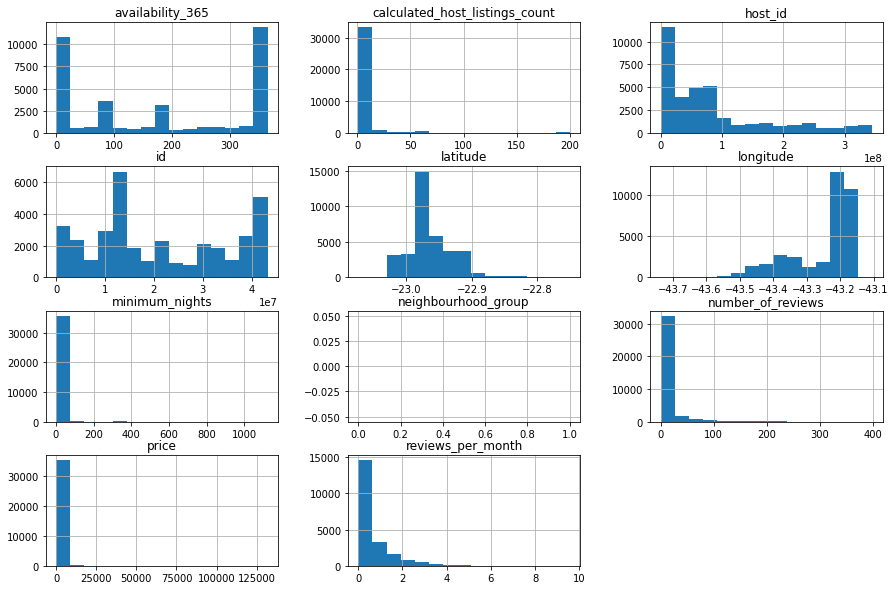

In [ ]:
# plotar o histograma das variáveis numéricas

df.hist(bins=15, figsize=(15,10));



### **4 - Há *outliers* presentes?**

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [ ]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,35870.000000,35870.000000,35870.000000,21104.000000,35870.000000,35870.000000
mean,753.686367,4.781851,9.822972,0.652248,6.613995,180.371815
std,2229.366334,22.471085,25.827647,0.823388,22.769663,152.510778
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,158.000000,1.000000,0.000000,0.130000,1.000000,0.000000
50%,298.000000,2.000000,1.000000,0.340000,1.000000,178.000000
75%,632.000000,4.000000,6.000000,0.830000,3.000000,363.000000
max,131727.000000,1123.000000,399.000000,9.570000,200.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

A variável price possui 75% do valor abaixo de 632, porém seu valor máximo é 131727.
A quantidade mínima de noites (minimum_nights) está acima de 365 dias no ano.
Boxplot para minimum_nights

#### Boxplot para price

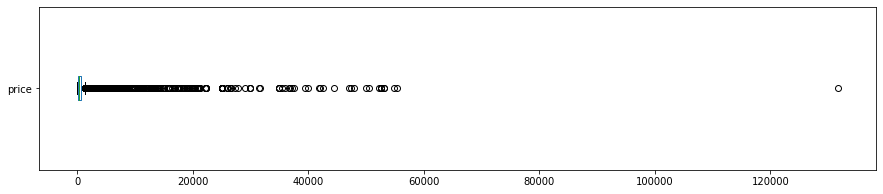


price: Valores acima de 1500:
3360 entradas
9.3672%


In [ ]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()
# ver quantidade de valores acima de 1500 para price
print('\nprice: Valores acima de 1500:')
print('{} entradas'.format(len(df[df.price > 1500])))
print('{:.4f}%'.format((len(df[df.price > 1500]) / df.shape[0])*100))



#### Boxplot para minimum_nights

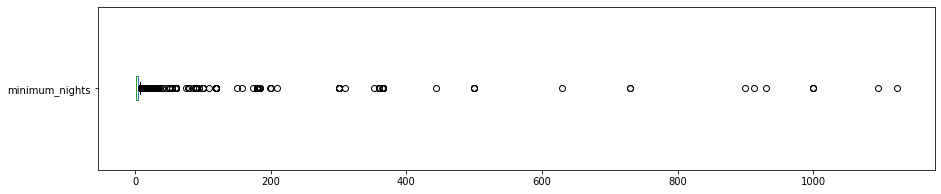

minimun_nigts: Valores acima de 30:
224 entradas
0.6245%


In [ ]:
# minimun_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# Ver a qauntidade de valores acima de 30 dias para mnimum_nights
print('minimun_nigts: Valores acima de 30:')
print('{} entradas'.format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0]) * 100))

#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

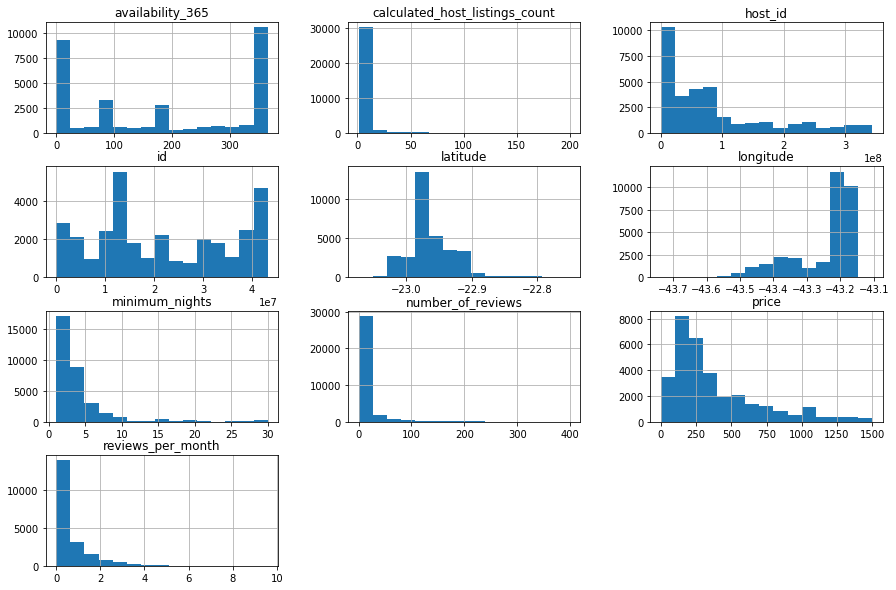

In [ ]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));



### **5 -  Qual a correlação existente entre as variáveis?**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

*   *O coeficiente de correlação varia de `-1` a `1`. 
Se valor é próximo de 1, isto significa que existe uma forte correlação positiva entre as variáveis. Quando esse número é próximo de -1, as variáveis tem uma forte correlação negativa.*

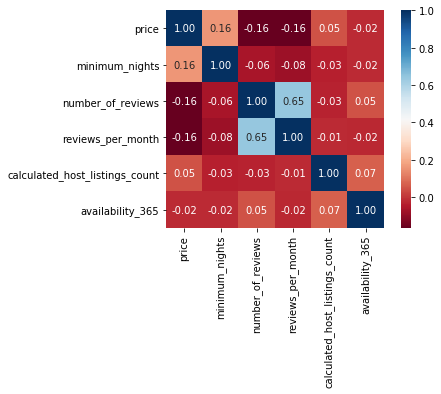

In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **6 - Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    22418
Private room        8969
Shared room          765
Hotel room           160
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
(df_clean.room_type.value_counts() / df_clean.shape[0]) * 100

Entire home/apt    69.379797
Private room       27.757489
Shared room         2.367541
Hotel room          0.495172
Name: room_type, dtype: float64

### **7 -  Qual a localidade mais cara do Rio?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.

In [ ]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]


neighbourhood
Vaz Lobo                  875.666667
Engenheiro Leal           800.000000
Ricardo de Albuquerque    601.200000
Paciência                 523.555556
Lagoa                     522.097859
Abolição                  483.666667
Leblon                    479.767359
Anchieta                  475.600000
Deodoro                   474.000000
Joá                       472.382979
Name: price, dtype: float64

Acima, vemos que bairros como Vaz Lobo, Engenheiro Albuquerque e Paciência, estão com média de preço superior a de lugares como Leblon, Barra da Tijuca e Lagoa.

Uma pessoa que não conhecesse o Rio poderia apresentar esses resultados sem se questionar. Só para dar um único exemplo de como uma amostra pode ser não-representativa, veja quantas entradas há nas cidades:

In [ ]:
# ver quantidade de imóveis no Vaz Lobo
print('Shape:', df_clean[df_clean.neighbourhood == 'Vaz Lobo'].shape)
print('\n')

# ver as entradas de Vaz Lobo
df_clean[df_clean.neighbourhood == 'Vaz Lobo']

Shape: (3, 15)




,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2908,2768499,Próximo ao Maracanã,14157867,Fernando,Vaz Lobo,-22.85955,-43.32918,Private room,1000,1,0,NaN,NaN,1,0
15776,14221134,"casa colonial 3 quartos, garagem",86402266,Lucia,Vaz Lobo,-22.85583,-43.32441,Entire home/apt,1329,15,0,NaN,NaN,1,365
33803,42012781,Casas flegler,332881900,Igor Flegler De Souza,Vaz Lobo,-22.86070,-43.32446,Private room,298,1,0,NaN,NaN,1,362


In [ ]:
# ver quantidade de imóveis no Engenheiro Leal
print('Shape:', df_clean[df_clean.neighbourhood == 'Engenheiro Leal'].shape)
print('\n')
# ver as entradas de Engenheiro Leal
df_clean[df_clean.neighbourhood == 'Engenheiro Leal']

Shape: (2, 15)




,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
22589,26996243,Engenheiro Leal Casa,159787826,Antonio,Engenheiro Leal,-22.87497,-43.32121,Entire home/apt,1499,15,0,NaN,NaN,2,365
34840,42403931,Quarto em Cascadura,336310280,Rodrigo,Engenheiro Leal,-22.87728,-43.32327,Private room,101,1,0,NaN,NaN,1,90


In [ ]:
# ver quantidade de imóveis no Ricardo de Albuquerque
print('Shape:', df_clean[df_clean.neighbourhood == 'Ricardo de Albuquerque'].shape)
print('\n')

# ver as entradas de Ricardo de Albuquerque
df_clean[df_clean.neighbourhood == 'Ricardo de Albuquerque']

Shape: (5, 15)




,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
3945,3106028,Rent home for World Cup season,14962884,Gilcéa,Ricardo de Albuquerque,-22.83446,-43.38553,Private room,1000,1,0,NaN,NaN,1,365
14220,13927176,Rent for the 2016 Olympics,81890830,Luiz,Ricardo de Albuquerque,-22.83942,-43.40542,Entire home/apt,1063,1,0,NaN,NaN,1,89
15898,14251471,House for Olympics near Complex Deodoro,86752448,Rafael,Ricardo de Albuquerque,-22.83933,-43.39691,Entire home/apt,523,6,0,NaN,NaN,1,0
16244,14382360,PARQUE OLIMPICO DE DEODORO- FAMILIAR,88303678,Olimpia Catarina De,Ricardo de Albuquerque,-22.84187,-43.40335,Private room,298,1,0,NaN,NaN,1,365
34639,42329773,Quitinete independente para casal ou +,330224882,Josue,Ricardo de Albuquerque,-22.83918,-43.39641,Entire home/apt,122,3,0,NaN,NaN,4,180


In [ ]:
# ver quantidade de imóveis no Paciência
print('Shape:', df_clean[df_clean.neighbourhood == 'Paciência'].shape)
print('\n')

# ver as entradas de Paciência
df_clean[df_clean.neighbourhood == 'Paciência']

Shape: (9, 15)




,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2371,2530079,Comfy Room for 2 people (only $80!),12956129,Vanessa,Paciência,-22.92713,-43.63608,Private room,425,1,0,NaN,NaN,1,365
11913,13192575,Apartamento aconchegante na zona sul,31376590,Reiner,Paciência,-22.92360,-43.62735,Entire home/apt,96,1,0,NaN,NaN,1,0
12597,13485696,Lar do Aconchego: sorrio porque sou Rio!!!,77238249,Danny,Paciência,-22.91813,-43.63329,Entire home/apt,479,1,0,NaN,NaN,1,365
15742,14215728,"RJ/ 2 quartos , cabem até dois casais.",86333217,Marlon,Paciência,-22.91853,-43.64091,Entire home/apt,399,1,0,NaN,NaN,2,89
15950,14264909,Rj/ Apartamento + tv a cabo + wifi,86333217,Marlon,Paciência,-22.91628,-43.63672,Entire home/apt,399,2,0,NaN,NaN,2,365
21143,22790931,"Praia, lazer e diversão com conforto.",157801922,Christiane,Paciência,-22.89247,-43.63677,Private room,1000,4,0,NaN,NaN,1,365
23682,29983771,Casa da Família,218943127,Fernanda,Paciência,-22.93083,-43.63605,Entire home/apt,202,5,0,NaN,NaN,1,90
27440,35530985,Espaçosa casa com 2 quartos.,267314910,Marcos,Paciência,-22.92320,-43.62381,Entire home/apt,213,30,0,NaN,NaN,1,365
35715,43204482,Casa Luxuosa,344002353,José Wagner,Paciência,-22.87399,-43.64529,Entire home/apt,1499,1,0,NaN,NaN,1,365


**Com essa análise exploratória posso definir que bairros: `Vaz Lobo`, `Engenheiro Leal`, `Ricardo de Albuquerque` e `Paciência` podem ser deletados, pois enfluência no resultado do nosso processo.**

In [ ]:
# deletando os bairros com menos entradas
df_clean.drop(df_clean[df_clean.neighbourhood == 'Vaz Lobo'].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.neighbourhood == 'Engenheiro Leal'].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.neighbourhood == 'Ricardo de Albuquerque'].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.neighbourhood == 'Paciência'].index, axis=0, inplace=True)


In [ ]:
# preço dos bairro depois da correção.
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Lagoa                522.097859
Abolição             483.666667
Leblon               479.767359
Anchieta             475.600000
Deodoro              474.000000
Joá                  472.382979
Engenho de Dentro    470.861111
Barra da Tijuca      470.478194
Inhoaíba             466.000000
Jacarepaguá          465.080763
Name: price, dtype: float64

Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.

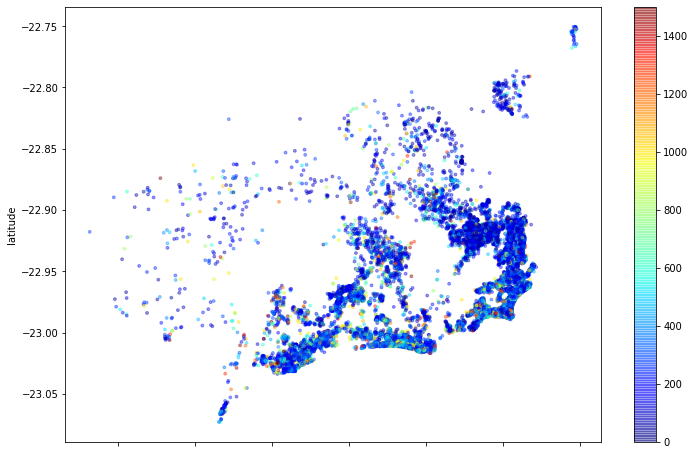

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

## Conclusões

Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem outliers em algumas das variáveis.

Também se notou que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos.

Uma curiosidade que percebi tambem sobre outliers, é se foi erro de cadastro(Digitação) ou erro sistêmico, porque na variavel price a presença dessas discrepâncias são muitas.
